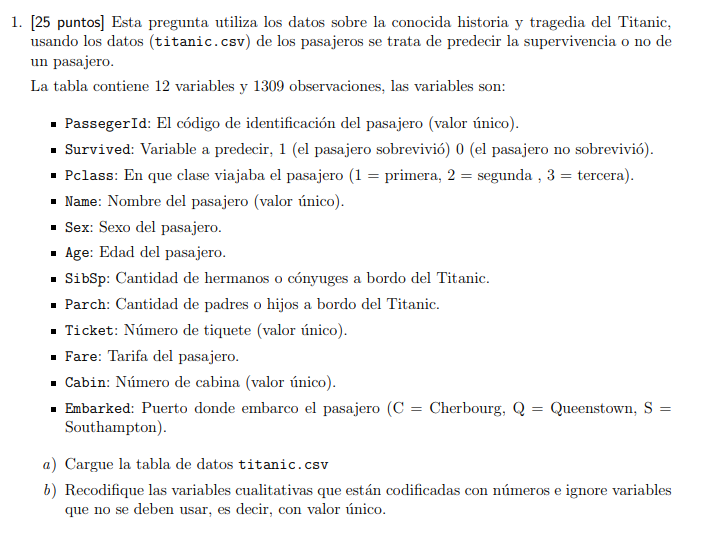

## Ejercicio 1.a

In [7]:
import os
import pandas as pd
import numpy as np
os.chdir("/Users/Andrey/Desktop/Data-Science-Course/V Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('Titanic.csv',delimiter=',',decimal=",",index_col=0)
print(datos)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28                  0       1   
29        

## Ejercicio 1.b

In [8]:
def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Survived"] = recodificar(datos["Survived"], {0:'No',1:'Yes'})
datos["Pclass"] = recodificar(datos["Pclass"], {1:'First',2:'Second',3:'Third'})
datos["Embarked"] = recodificar(datos["Embarked"], {'C':'Cherbourg', 'Q':'Queenstown','S':'Southampton'})

print(datos.head())

print("******************************\n")

print(datos['Survived'].value_counts())

print("******************************\n")

print(datos['Pclass'].value_counts())

print("******************************\n")

print(datos['Embarked'].value_counts())

            Survived Pclass  \
PassengerId                   
1                 No  Third   
2                Yes  First   
3                Yes  Third   
4                Yes  First   
5                 No  Third   

                                                          Name     Sex Age  \
PassengerId                                                                  
1                                      Braund, Mr. Owen Harris    male  22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38   
3                                       Heikkinen, Miss. Laina  female  26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35   
5                                     Allen, Mr. William Henry    male  35   

             SibSp  Parch            Ticket     Fare Cabin     Embarked  
PassengerId                                                              
1                1      0         A/5 21171     7.25   NaN  Southampton  
2            

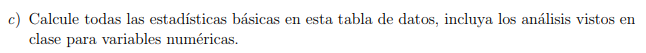

In [9]:
print("******************************\n")

print("Describe")

print(datos.dropna().describe())

print("******************************\n")

print("Means")

print(datos.mean(numeric_only=True))

print("******************************\n")

print("STDs")

print(datos.median(numeric_only=True))

print("******************************\n")

print("Maximo")

print(datos.max(numeric_only=True))

print("******************************\n")

print("Percentiles")

print(datos.quantile(np.array([0,.25,.50,.75,1])))

print("******************************\n")

print("Datos en variables categóricas\n")

print("Sobrevivientes:")

print(datos['Survived'].value_counts())

print("******************************\n")

print("Clase:")

print(datos['Pclass'].value_counts())

print("******************************\n")

print("Puerto en el que embarcó:")

print(datos['Embarked'].value_counts())

print("******************************\n")

print("TABLA CRUZADA - Supervivencia por clase:")

survived_pclass = pd.crosstab(index=datos["Survived"], columns=datos["Pclass"])
print(survived_pclass)

print("******************************\n")

print("TABLA CRUZADA - Supervivencia por puerto de embarco:")

survived_pclass = pd.crosstab(index=datos["Survived"], columns=datos["Embarked"])
print(survived_pclass)

print("TABLA CRUZADA - Supervivencia por genero:")

survived_pclass = pd.crosstab(index=datos["Survived"], columns=datos["Sex"])
print(survived_pclass)

******************************

Describe
            SibSp       Parch
count  270.000000  270.000000
mean     0.507407    0.477778
std      0.643773    0.788784
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      3.000000    4.000000
******************************

Means
SibSp    0.499617
Parch    0.385616
dtype: float64
******************************

STDs
SibSp    0.0
Parch    0.0
dtype: float64
******************************

Maximo
SibSp    8
Parch    9
dtype: int64
******************************

Percentiles
      SibSp  Parch
0.00    0.0    0.0
0.25    0.0    0.0
0.50    0.0    0.0
0.75    1.0    0.0
1.00    8.0    9.0
******************************

Datos en variables categóricas

Sobrevivientes:
No     815
Yes    492
Name: Survived, dtype: int64
******************************

Clase:
Third     709
First     321
Second    277
Name: Pclass, dtype: int64
******************************

Puerto en el que em

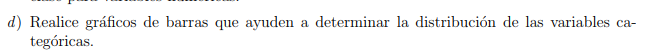

SURVIVED


([<matplotlib.axis.XTick at 0x25e00c23b38>,
 <a list of 2 Text xticklabel objects>)

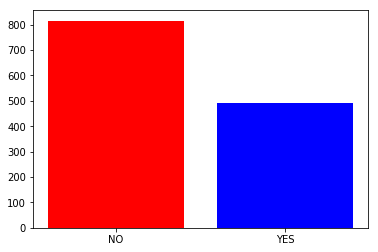

In [11]:
import matplotlib.pyplot as plt

print("SURVIVED")

g_chd = pd.crosstab(index=datos["Survived"], columns="count") 

alto = [g_chd['count'][0], g_chd['count'][1]]
barras = ('NO', 'YES')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['red','blue'])
plt.xticks(y_pos, barras)

##

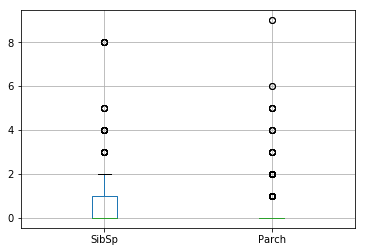

In [12]:
datos.head()
boxplots = datos.boxplot(return_type='axes')

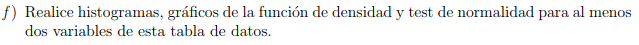

Graficos funcion de densidad para hermanos o conyugues


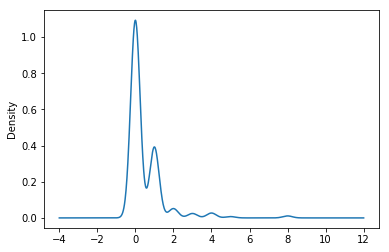

In [13]:
print("Graficos funcion de densidad para hermanos o conyugues")

densidad = datos["SibSp"].plot(kind='density')

Graficos funcion de densidad para hijos o padres


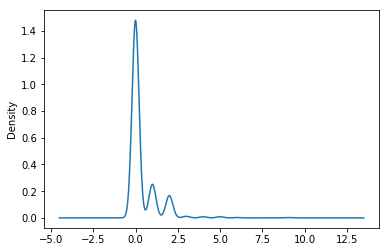

In [14]:
print("Graficos funcion de densidad para hijos o padres")

densidad = datos["Parch"].plot(kind='density')

Histogramas para hermanos o conyugues


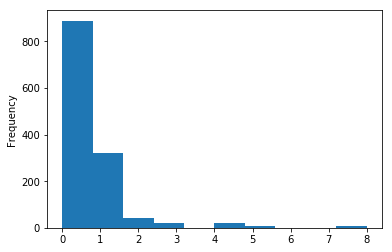

In [15]:
print("Histogramas para hermanos o conyugues")

densidad = datos["SibSp"].plot(kind='hist')

Histogramas para hijos o padres


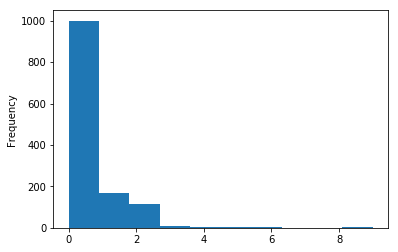

In [16]:
print("Histogramas para hijos o padres")

densidad = datos["Parch"].plot(kind='hist')

In [17]:
import scipy.stats

"""
Para pruebas de normalidad siempre se plantean así las hipótesis.

Hipótesis:

H0: La muestra proviene de una distribución normal.

H1: La muestra no proviene de una distribución normal.

Nivel de Significancia: El nivel de significancia que se trabajará es de 0.05. Alpha=0.05

Criterio de Decisión

Si P < Alpha Se rechaza H0

Si p >= Alpha No se rechaza H0, es decir, los datos SÍ siguen la normal
"""

shapiro_resultados = scipy.stats.shapiro(datos.iloc[:,6:7])
print(shapiro_resultados)

p_value = shapiro_resultados[1]
print(p_value)

alpha = 0.05
if p_value > alpha:
    print('Sí sigue la curva Normal (No se rechaza H0)')
else:
    print('No sigue la curva Normal (Se rechaza H0)')

(0.49837225675582886, 0.0)
0.0
No sigue la curva Normal (Se rechaza H0)


C:\Users\Andrey\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Andrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Andrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Andrey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer

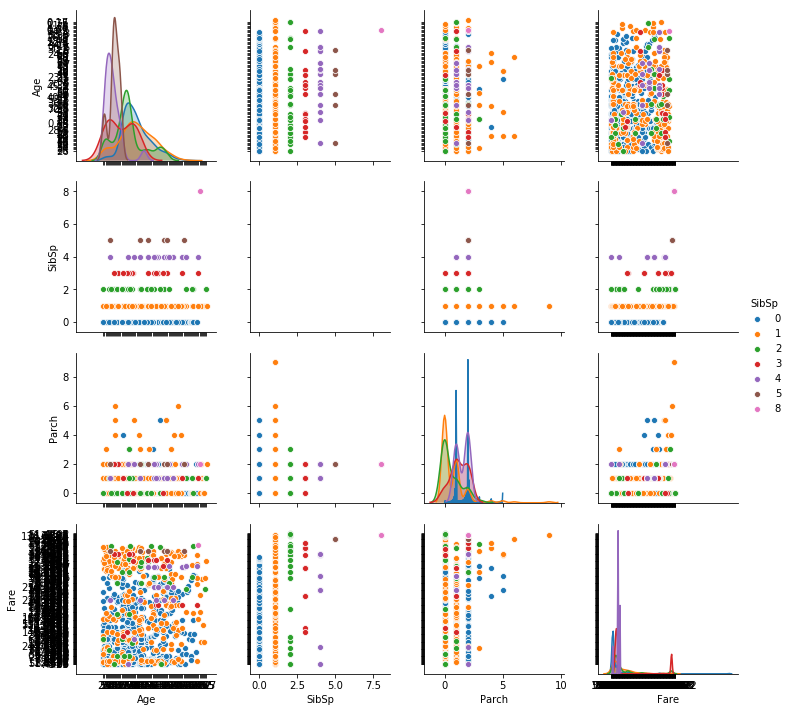

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(datos, hue='SibSp', size=2.5)

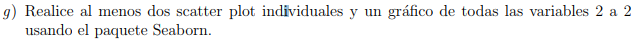

C:\Users\Andrey\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


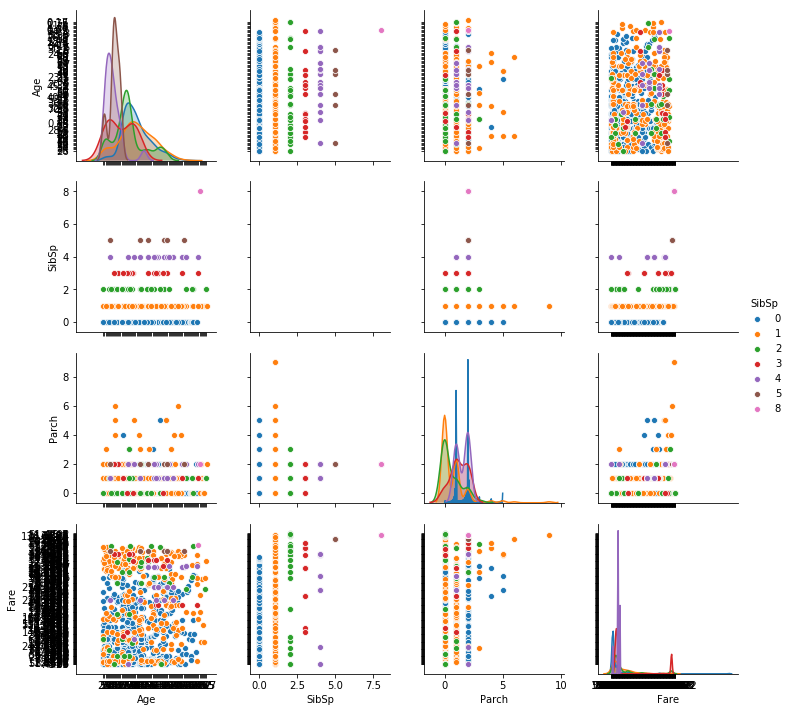

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(datos, hue='SibSp', size=2.5)

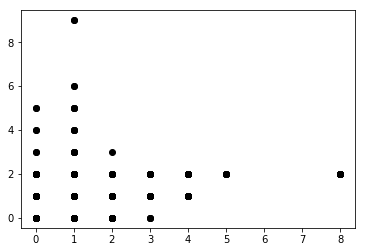

In [20]:
x = datos.iloc[:]["SibSp"]
y = datos.iloc[:]["Parch"]
plt.plot(x, y, 'o', color='black')

Matriz de correlaciones 

          SibSp     Parch
SibSp  1.000000  0.373383
Parch  0.373383  1.000000


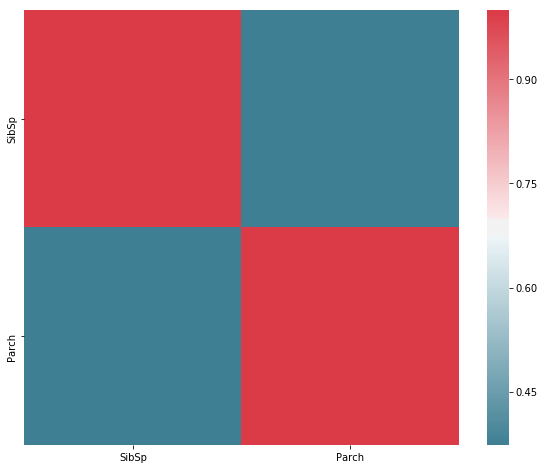

In [21]:
corr = datos.corr()
print("Matriz de correlaciones \n")
print(corr)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

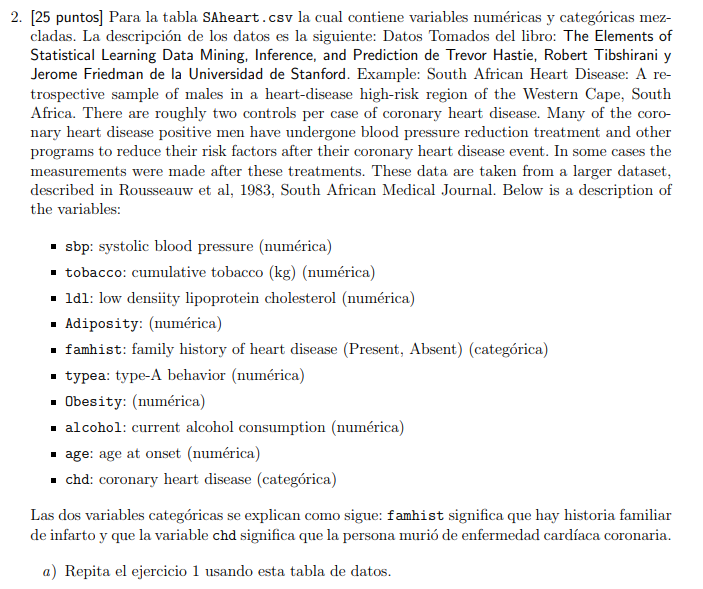